# 4) Aggregation & Date Ranges

In [1]:
import pandas as pd
import numpy as np
import datetime as datetime
import matplotlib.pyplot as plt
import clr
clr.AddReference(r"G:/HyTools/Swax/Qha_n7.exe")
from QueenslandHydrology.PythonApi import *

In [2]:
plt.rcParams['figure.figsize'] = [13, 7]

In [3]:
ts_daily = QHA.TS.Read('.\Resources\TimeseriesData\granite_belt_modelled_gauges.pid', r"Gauge>1006 Severn River at Farnbro (416310A)>Downstream Flow")
print(ts_daily)
print("MEAN")
print(np.mean(ts_daily.GetValues()))

Index: 8
Name: Gauge>1006 Severn River at Farnbro (416310A)>Downstream Flow
Timestep: day
Length: 47481
Start: 1/07/1889 12:00:00 AM
End: 30/06/2019 12:00:00 AM
Units: ML.day^-1 

MEAN
146.6585186635291


### To Monthly

In [4]:
ts_monthly = ts_daily.ToMonthly()
print(ts_monthly)
print("MEAN")
print(np.mean(ts_monthly.GetValues()))

Index: 8
Name: Gauge>1006 Severn River at Farnbro (416310A)>Downstream Flow
Timestep: month
Length: 1560
Start: 1/07/1889 12:00:00 AM
End: 1/06/2019 12:00:00 AM
Units: ML.day^-1 

MEAN
4463.77764401476


In [5]:
### WARNING... AGGREGATION DOES NOT CHANGE THE UNITS, ALTHOUGH MAYBE IT SHOULD.

### To Annual

In [6]:
ts_annual = ts_daily.ToAnnual()
#ts_annual = ts_monthly.ToAnnual()
print(ts_annual)
print("MEAN")
print(np.mean(ts_annual.GetValues()))

Index: 8
Name: Gauge>1006 Severn River at Farnbro (416310A)>Downstream Flow
Timestep: year
Length: 130
Start: 1/01/1889 12:00:00 AM
End: 1/01/2018 12:00:00 AM
Units: ML.day^-1 

MEAN
nan


In [7]:
ts_annual_7 = ts_daily.ToAnnual(7)
print(ts_annual_7)
print("MEAN")
print(np.mean(ts_annual_7.GetValues()))

Index: 8
Name: Gauge>1006 Severn River at Farnbro (416310A)>Downstream Flow
Timestep: year
Length: 130
Start: 1/07/1889 12:00:00 AM
End: 1/07/2018 12:00:00 AM
Units: ML.day^-1 

MEAN
53565.331728177116


In [8]:
df = pd.DataFrame()
df['Year'] = [i for i in range(1889,2019)]
df = df.set_index('Year')
df['416310A Jan-Dec'] = ts_annual.GetValues()
df['416310A Jul-Jun'] = ts_annual_7.GetValues()
df

416310A Jan-Dec  416310A Jul-Jun
Year                                  
1889              NaN    416900.414334
1890    353482.302260     97222.596042
1891    154208.909360    139873.906096
1892    186085.885574    439909.504551
1893    350713.656526     40559.909093
1894     26367.654571     26919.068032
1895     26267.171295     27107.577191
1896     31448.526190     56408.118578
1897    136285.015308    143366.548203
1898     59148.702474     12496.189498
1899     16394.812829     17664.869200
1900     17150.101787      3383.855918
1901      2794.095498      2794.095498
1902         0.000000      8497.118989
1903    140388.164192    192626.262907
1904     63362.167465      4936.719056
1905      2523.207595      5872.124568
1906     14974.715038     29246.928364
1907     21541.438487      4745.728549
1908      6152.018187      3016.828530
1909      8087.545636     15005.594997
1910      9832.137374      6678.169001
1911      3764.080988      1333.440719
1912      5340.176056     12238.272572
1913     13336.325204      7909.378868
1914      3143.729975      1686.012995
1915      1346.873919      7313.179299
1916     26807.343411     66625.049207
1917    195127.535498    176889.289259
1918     28892.638856     21476.538984
...               ...              ...
1989    122408.145951    140335.640062
1990     81688.258288     13124.431220
1991     11558.971109     15631.419660
1992     15901.503964       417.712685
1993         0.000000      4858.552622
1994      4858.552622      1745.150000
1995      4410.380732     87836.586699
1996     91182.206476     16090.137277
1997     12978.374238      2944.530888
1998     23178.342894     35722.529461
1999     55970.284703     43537.441157
2000       156.786439     88699.027415
2001     93621.951862      5063.368939
2002       140.444491      1588.226892
2003      4163.891649      9894.680751
2004      7700.032779       401.002565
2005        91.265423       987.316349
2006      1166.436706      1097.100000
2007      5286.152837     36276.246645
2008     36656.074603     12786.898729
2009      8307.417934       680.700000
2010    187222.014754    415878.519952
2011    234262.290207     17225.592387
2012     11960.707378     44577.105659
2013     45959.857846      9113.844663
2014     31690.628679     36198.620578
2015     13789.998721      4559.269760
2016     35456.466961     71213.376032
2017     39215.640005      5801.525075
2018      5351.149557         0.000000

[130 rows x 2 columns]

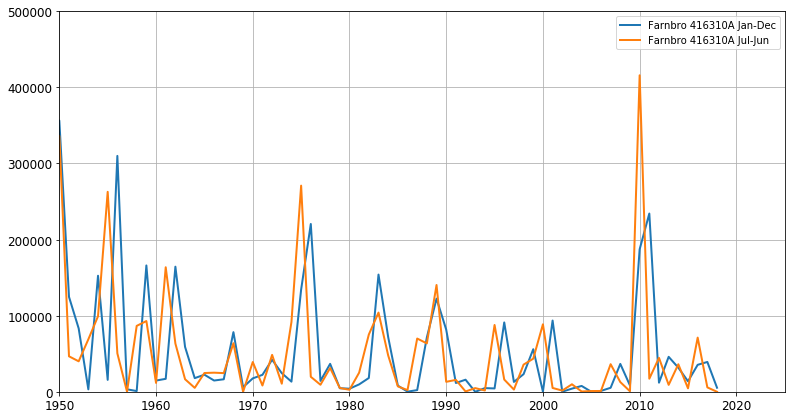

In [9]:
fig, ax = plt.subplots()
ax.grid()
ax.set_ylim([0, 500000])
ax.set_xlim([1950, 2025])
ax.tick_params(axis='both', which='major', labelsize=12)
ax.plot(df['416310A Jan-Dec'], linewidth='2', label='Farnbro 416310A Jan-Dec')
ax.plot(df['416310A Jul-Jun'], linewidth='2', label='Farnbro 416310A Jul-Jun')
ax.legend()

## Other kinds of aggregation

### Min, Max, Mean

In [10]:
ts_monthly_min = ts_daily.ToMonthlyMin()
ts_monthly_max = ts_daily.ToMonthlyMax()
ts_monthly_mean = ts_daily.ToMonthlyMean()
ts_monthly_tot = ts_daily.ToMonthly()

df = pd.DataFrame()
df['Month'] = [i for i in range(ts_monthly_min.Length)]
df = df.set_index('Month')
df['Min'] = ts_monthly_min.GetValues()
df['Max'] = ts_monthly_max.GetValues()
df['Mean'] = ts_monthly_mean.GetValues()
df['Tot'] = ts_monthly_tot.GetValues()
df

Min           Max         Mean            Tot
Month                                                      
0        0.000000  18402.772774  1793.479763   55597.872664
1       70.784306    699.470244   248.640191    7707.845935
2        8.047197     78.534938    30.776267     923.288014
3        0.000000      7.332991     0.993934      30.811950
4        0.000000      0.000000     0.000000       0.000000
5        0.000000      0.000000     0.000000       0.000000
6        0.000000    206.800444    84.376468    2615.670520
7       74.977516   5009.552025  1635.936661   45806.226501
8      859.408725  58862.400199  8592.936763  266381.039659
9      304.473823   3631.718384  1036.779901   31103.397025
10      86.914125    286.456687   157.444498    4880.779430
11      47.519115     83.147631    61.782755    1853.482636
12       0.000000      0.000000     0.000000       0.000000
13       0.000000      1.561343     0.428838      13.293975
14       0.000000     10.191151     6.711278     201.338351
15       5.774367      8.305716     7.066800     219.070797
16       4.737466     19.549334     9.200306     276.009183
17       1.956294      8.079534     4.257877     131.994181
18       0.961788   7695.440446  1012.910791   31400.234529
19     227.844773   9879.830583  1346.556115   37703.571215
20      28.223985    214.853696    91.436082    2834.518554
21      16.793206     24.931873    19.457846     583.735374
22      10.690872     16.279485    13.529125     419.402879
23      11.564711   4863.006286   781.314233   23439.427001
24       0.000000   2717.234348   368.609786   11426.903357
25      96.200220   2873.838183   515.719363   15987.300252
26      70.305111   4301.726505   726.411944   21792.358324
27      24.636583    228.577007    92.912465    2880.286406
28       8.781305    258.927472    53.639839    1609.195165
29      45.605816    295.471092   133.289558    4131.976303
...           ...           ...          ...            ...
1530     0.000000      0.000000     0.000000       0.000000
1531     0.000000      0.000000     0.000000       0.000000
1532     0.000000   2991.307849   387.543811   12013.858151
1533   136.358835   7243.642897   827.521435   24825.643053
1534    18.885678    135.669406    51.976930    1611.284844
1535     3.758686     17.786831    10.482615     314.478439
1536     0.000000      0.000000     0.000000       0.000000
1537     0.000000      0.000000     0.000000       0.000000
1538     0.000000      0.000000     0.000000       0.000000
1539     0.000000      0.000000     0.000000       0.000000
1540     0.000000     11.006474     0.366882      11.006474
1541     0.000000    176.758656    14.173195     439.369044
1542    12.968768    424.270793    80.383086    2491.875680
1543     0.000000     82.966543     9.775759     273.721258
1544    21.626636    240.000000    78.476840    2432.782038
1545     0.000000     19.595258     5.092353     152.770580
1546     0.000000      0.000000     0.000000       0.000000
1547     0.000000      0.000000     0.000000       0.000000
1548     0.000000      0.000000     0.000000       0.000000
1549     0.000000      0.000000     0.000000       0.000000
1550     0.000000      0.000000     0.000000       0.000000
1551     0.000000      0.000000     0.000000       0.000000
1552     0.000000      0.000000     0.000000       0.000000
1553     0.000000      0.000000     0.000000       0.000000
1554     0.000000      0.000000     0.000000       0.000000
1555     0.000000      0.000000     0.000000       0.000000
1556     0.000000      0.000000     0.000000       0.000000
1557     0.000000      0.000000     0.000000       0.000000
1558     0.000000      0.000000     0.000000       0.000000
1559     0.000000      0.000000     0.000000       0.000000

[1560 rows x 4 columns]

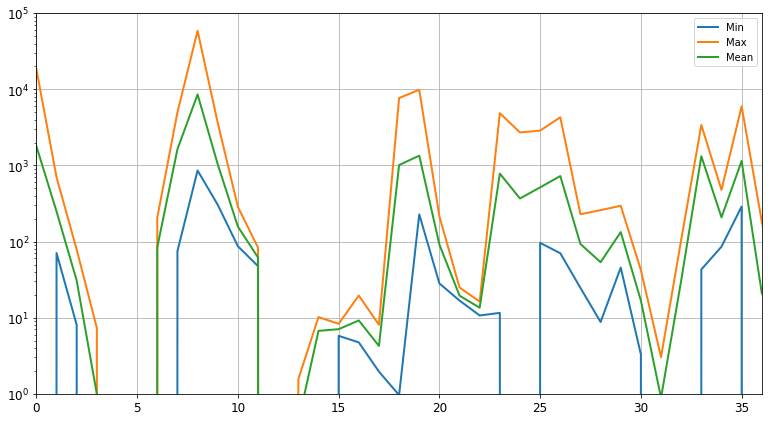

In [11]:
fig, ax = plt.subplots()
ax.set_yscale('log')
ax.grid()
ax.set_ylim([1, 100000])
ax.set_xlim([0, 36])
ax.tick_params(axis='both', which='major', labelsize=12)
ax.plot(df['Min'], linewidth='2', label='Min')
ax.plot(df['Max'], linewidth='2', label='Max')
ax.plot(df['Mean'], linewidth='2', label='Mean')
ax.legend()

### Combos

In [12]:
#### The minimum monthly total each year
ts_annual_min_monthly_total = ts_daily.ToMonthly().ToAnnualMin(7)
print(ts_annual_min_monthly_total)
print("MEAN")
print(np.mean(ts_annual_min_monthly_total.GetValues()))

Index: 8
Name: Gauge>1006 Severn River at Farnbro (416310A)>Downstream Flow
Timestep: year
Length: 130
Start: 1/07/1889 12:00:00 AM
End: 1/07/2018 12:00:00 AM
Units: ML.day^-1 

MEAN
19.185637329770614


## Changing the timeseries period

### Sub-period

In [13]:
# Annual flow over full period.
np.mean(ts_daily.ToAnnual(7).GetValues())

53565.331728177116

In [23]:
# Get a new timesries for the desired period.
ts_assessment = ts_daily.GetPeriod('1895-07-01', '2014-06-30')
print(ts_assessment)
print("MEAN")
np.mean(ts_assessment.ToAnnual(7).GetValues())

Index: 8
Name: Gauge>1006 Severn River at Farnbro (416310A)>Downstream Flow
Timestep: day
Length: 43464
Start: 1/07/1895 12:00:00 AM
End: 30/06/2014 12:00:00 AM
Units: ML.day^-1 

MEAN


47767.52046277715

### Extended period

In [18]:
ts_assessment = ts_daily.GetPeriod('1800-07-01', '2030-06-30')
print(ts_assessment)
print("MEAN")
np.mean(ts_assessment.ToAnnual(7).GetValues())

Index: 8
Name: Gauge>1006 Severn River at Farnbro (416310A)>Downstream Flow
Timestep: day
Length: 84006
Start: 1/07/1800 12:00:00 AM
End: 30/06/2030 12:00:00 AM
Units: ML.day^-1 

MEAN


nan